<a href="https://colab.research.google.com/github/karandoshi1810/Machine-Learning/blob/main/Logistic(on_Dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
#Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
#To import datafiles from Google Drive
from google.colab import drive

In [ ]:
#To mount the drive data into colab cloud and enter the activation code
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/"My Drive/Colab Notebooks/Dataset" 

/content/drive/My Drive/Colab Notebooks/Dataset


In [ ]:

df=pd.read_csv("insurance.csv")
print(df)
df.shape

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


(1338, 7)

In [ ]:
df = pd.DataFrame(df)#typecasting to dataframe
df.describe()#function to check the function of dataset

#creating classes of insurance based on charges applied on an insurance using 
#median beacuse it is not prone to outliers
median_insurance = df['charges'].median()
print("Median:",median_insurance)
#df = pd.get_dummies(df)
df.head

Median: 9382.033


<bound method NDFrame.head of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [ ]:
df['insurance_approval']=[0 for i in range(len(df['charges']))]
for i in range(0,len(df['charges'])-1):
  if df['charges'][i]>median_insurance:
    df['insurance_approval'][i]=1
  else:
    df['insurance_approval'][i]=0

#converting categorical data to numerical data
sex_code = {'male':1, 'female':2}
df['sex'] = df['sex'].map(sex_code)
smoker_code = {'yes':1, 'no':0}
df['smoker'] = df['smoker'].map(smoker_code)
region_code = {'southwest':1, 'southeast':2,'northeast':3,'northwest':4}
df['region'] = df['region'].map(region_code)

df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,age,sex,bmi,children,smoker,region,charges,insurance_approval
0,19,2,27.900,0,1,1,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,0
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,4,21984.47061,1
4,32,1,28.880,0,0,4,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,4,10600.54830,1
1334,18,2,31.920,0,0,3,2205.98080,0
1335,18,2,36.850,0,0,2,1629.83350,0
1336,21,2,25.800,0,0,1,2007.94500,0


In [ ]:
#split dataset in features and target variable
feature_cols = ['age', 'sex', 'bmi', 'smoker']
X = df[feature_cols] # Features
y = df.insurance_approval # Target variable

In [18]:
#Creating training and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [19]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

y_pred=logreg.predict(X_test)

In [20]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[157,  18],
       [ 15, 145]])

Text(0.5, 257.44, 'Predicted label')

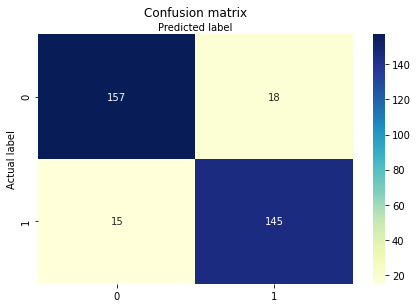

In [22]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [24]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)
print("Precision:",metrics.precision_score(y_test, y_pred)*100)
print("Recall:",metrics.recall_score(y_test, y_pred)*100)

Accuracy: 90.14925373134328
Precision: 88.95705521472392
Recall: 90.625
